# Загрузка данных из Excel файла

In [1]:
%pylab inline
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas_datareader import data
import statsmodels.tsa.api as smt
from sklearn.metrics import mean_squared_error
from itertools import product
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


In [2]:
#df = pd.read_excel('train.xlsx', sheet_name='semiconductor companies')
#X = df.columns[4]
#train = pd.DataFrame(df[X])

In [3]:
#train.head()

In [4]:
#plt.figure(figsize=(15,7))
#train[X].plot()
#plt.ylabel(X)

In [8]:
from pandas_datareader import data
import fix_yahoo_finance as yf

In [9]:
tickers = ['AMZN', 'GOOGL', 'AMS', 'BABA', 'INTC', 'AMD', 'AVGO', 'MU', 'ADBE', 'INTU', 'MSFT', 'ORCL', 'AAPL', 'FJTSY',
          'HPQ', 'IBM']

In [41]:
yf.pdr_override() 

symbol = tickers#[1]
data_source='google'
start_date = '2016-12-31'
end_date = '2017-07-31'
df = data.get_data_yahoo(symbol, start_date, end_date)

df['Close'].head()

[*********************100%***********************]  16 of 16 downloaded


,AMZN,GOOGL,AMS,BABA,INTC,AMD,AVGO,MU,ADBE,INTU,MSFT,ORCL,AAPL,FJTSY,HPQ,IBM
Date,,,,,,,,,,,,,,,,
2016-12-30,749.869995,792.450012,3.35,87.809998,36.270000,11.34,176.770004,21.920000,102.949997,114.610001,62.139999,38.450001,115.820000,27.840000,14.84,165.990005
2017-01-03,753.669983,808.010010,3.40,88.599998,36.599998,11.43,178.339996,22.549999,103.480003,114.750000,62.580002,38.549999,116.150002,27.969999,14.85,167.190002
2017-01-04,757.179993,807.770020,3.35,90.510002,36.410000,11.43,177.070007,22.360001,104.139999,114.980003,62.299999,38.740002,116.019997,28.540001,15.08,169.259995
2017-01-05,780.450012,813.020020,3.45,94.370003,36.349998,11.24,174.279999,22.110001,105.910004,115.690002,62.299999,38.639999,116.610001,28.540001,15.07,168.699997
2017-01-06,795.989990,825.210022,3.40,93.889999,36.480000,11.32,176.589996,22.040001,108.300003,116.860001,62.840000,38.450001,117.910004,29.700001,15.00,169.529999


In [42]:
df = df['Close']

In [79]:
df.columns

Index(['AMZN', 'GOOGL', 'AMS', 'BABA', 'INTC', 'AMD', 'AVGO', 'MU', 'ADBE',
       'INTU', 'MSFT', 'ORCL', 'AAPL', 'FJTSY', 'HPQ', 'IBM'],
      dtype='object')

In [133]:
import datetime

dates = []

start = datetime.datetime.strptime("30-12-2016", "%d-%m-%Y")
end = datetime.datetime.strptime("31-07-2017", "%d-%m-%Y")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]

for date in date_generated:
    dates.append(date.strftime("%m-%d-%Y"))

In [134]:
dates

['12-30-2016',
 '12-31-2016',
 '01-01-2017',
 '01-02-2017',
 '01-03-2017',
 '01-04-2017',
 '01-05-2017',
 '01-06-2017',
 '01-07-2017',
 '01-08-2017',
 '01-09-2017',
 '01-10-2017',
 '01-11-2017',
 '01-12-2017',
 '01-13-2017',
 '01-14-2017',
 '01-15-2017',
 '01-16-2017',
 '01-17-2017',
 '01-18-2017',
 '01-19-2017',
 '01-20-2017',
 '01-21-2017',
 '01-22-2017',
 '01-23-2017',
 '01-24-2017',
 '01-25-2017',
 '01-26-2017',
 '01-27-2017',
 '01-28-2017',
 '01-29-2017',
 '01-30-2017',
 '01-31-2017',
 '02-01-2017',
 '02-02-2017',
 '02-03-2017',
 '02-04-2017',
 '02-05-2017',
 '02-06-2017',
 '02-07-2017',
 '02-08-2017',
 '02-09-2017',
 '02-10-2017',
 '02-11-2017',
 '02-12-2017',
 '02-13-2017',
 '02-14-2017',
 '02-15-2017',
 '02-16-2017',
 '02-17-2017',
 '02-18-2017',
 '02-19-2017',
 '02-20-2017',
 '02-21-2017',
 '02-22-2017',
 '02-23-2017',
 '02-24-2017',
 '02-25-2017',
 '02-26-2017',
 '02-27-2017',
 '02-28-2017',
 '03-01-2017',
 '03-02-2017',
 '03-03-2017',
 '03-04-2017',
 '03-05-2017',
 '03-06-20

In [135]:
db = pd.DataFrame()
db['a'] = zeros(213)

In [136]:
db.index = dates

In [137]:
db

,a
12-30-2016,0.0
12-31-2016,0.0
01-01-2017,0.0
01-02-2017,0.0
01-03-2017,0.0
01-04-2017,0.0
01-05-2017,0.0
01-06-2017,0.0
01-07-2017,0.0
01-08-2017,0.0


In [138]:
D = db.join(df)

In [141]:
D

,a,AMZN,GOOGL,AMS,BABA,INTC,AMD,AVGO,MU,ADBE,INTU,MSFT,ORCL,AAPL,FJTSY,HPQ,IBM
2016-12-30,0.0,749.869995,792.450012,3.35,87.809998,36.270000,11.34,176.770004,21.920000,102.949997,114.610001,62.139999,38.450001,115.820000,27.840000,14.840000,165.990005
2016-12-31,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-02,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,0.0,753.669983,808.010010,3.40,88.599998,36.599998,11.43,178.339996,22.549999,103.480003,114.750000,62.580002,38.549999,116.150002,27.969999,14.850000,167.190002
2017-01-04,0.0,757.179993,807.770020,3.35,90.510002,36.410000,11.43,177.070007,22.360001,104.139999,114.980003,62.299999,38.740002,116.019997,28.540001,15.080000,169.259995
2017-01-05,0.0,780.450012,813.020020,3.45,94.370003,36.349998,11.24,174.279999,22.110001,105.910004,115.690002,62.299999,38.639999,116.610001,28.540001,15.070000,168.699997
2017-01-06,0.0,795.989990,825.210022,3.40,93.889999,36.480000,11.32,176.589996,22.040001,108.300003,116.860001,62.840000,38.450001,117.910004,29.700001,15.000000,169.529999
2017-01-07,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-08,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
D = D[D.columns[1:]].interpolate()

In [145]:
D = D.sort_index()

In [152]:
D[(D.index > '2016-12-31') & (D.index < '2017-02-01')]

,AMZN,GOOGL,AMS,BABA,INTC,AMD,AVGO,MU,ADBE,INTU,MSFT,ORCL,AAPL,FJTSY,HPQ,IBM
2017-01-01,751.769989,800.230011,3.375000,88.204998,36.434999,11.385000,177.555000,22.235000,103.215000,114.680001,62.360000,38.500000,115.985001,27.904999,14.845000,166.590003
2017-01-02,752.719986,804.120011,3.387500,88.402498,36.517499,11.407500,177.947498,22.392499,103.347501,114.715000,62.470001,38.524999,116.067501,27.937499,14.847500,166.890003
2017-01-03,753.669983,808.010010,3.400000,88.599998,36.599998,11.430000,178.339996,22.549999,103.480003,114.750000,62.580002,38.549999,116.150002,27.969999,14.850000,167.190002
2017-01-04,757.179993,807.770020,3.350000,90.510002,36.410000,11.430000,177.070007,22.360001,104.139999,114.980003,62.299999,38.740002,116.019997,28.540001,15.080000,169.259995
2017-01-05,780.450012,813.020020,3.450000,94.370003,36.349998,11.240000,174.279999,22.110001,105.910004,115.690002,62.299999,38.639999,116.610001,28.540001,15.070000,168.699997
2017-01-06,795.989990,825.210022,3.400000,93.889999,36.480000,11.320000,176.589996,22.040001,108.300003,116.860001,62.840000,38.450001,117.910004,29.700001,15.000000,169.529999
2017-01-07,796.299988,825.866679,3.416667,94.166666,36.523334,11.376667,176.716664,22.140001,108.390002,116.743335,62.773333,38.643334,118.270002,29.700001,14.893333,168.903331
2017-01-08,796.609985,826.523336,3.433333,94.443334,36.566667,11.433333,176.843333,22.240000,108.480001,116.626668,62.706666,38.836666,118.630000,29.700001,14.786667,168.276662
2017-01-09,796.919983,827.179993,3.450000,94.720001,36.610001,11.490000,176.970001,22.340000,108.570000,116.510002,62.639999,39.029999,118.989998,29.700001,14.680000,167.649994
2017-01-10,795.900024,826.010010,4.100000,96.750000,36.540001,11.440000,180.570007,22.480000,108.260002,116.110001,62.619999,38.660000,119.110001,29.219999,14.690000,165.520004


In [167]:
#1 month
train = D[(D.index > '2016-12-31') & (D.index < '2017-02-01')]
test = D[(D.index >= '2017-02-01') & (D.index < '2017-02-11')]

#2 month
#train = D[(D.index > '2016-12-31') & (D.index < '2017-03-01')]
#test = D[(D.index >= '2017-03-01') & (D.index < '2017-03-11')]
#
##3 month
#train = D[(D.index > '2016-12-31') & (D.index < '2017-04-01')]
#test = D[(D.index >= '2017-04-01') & (D.index < '2017-04-11')]
#
##6 month
#train = D[(D.index > '2016-12-31') & (D.index < '2017-07-01')]
#test = D[(D.index >= '2017-07-01') & (D.index < '2017-07-11')]

In [168]:
train.columns

Index(['AMZN', 'GOOGL', 'AMS', 'BABA', 'INTC', 'AMD', 'AVGO', 'MU', 'ADBE',
       'INTU', 'MSFT', 'ORCL', 'AAPL', 'FJTSY', 'HPQ', 'IBM'],
      dtype='object')

In [165]:
X = 'AMZN'

In [169]:
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(train[X])[1])

Критерий Дики-Фуллера: p=0.076555


# Метод скользящего среднего 

In [170]:
train['diff'] = train[X] - train[X].shift(1)

/Users/aleksandra/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


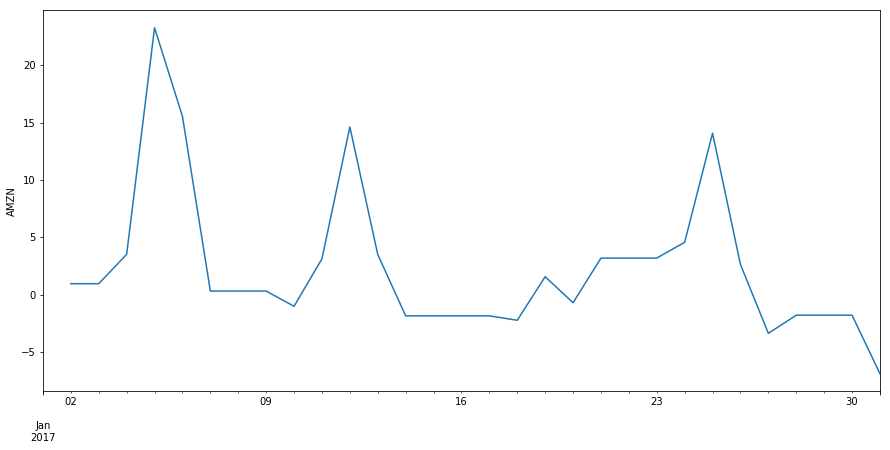

In [171]:
plt.figure(figsize=(15,7))
train['diff'].plot()
plt.ylabel(X)

Критерий Дики-Фуллера: p=0.031004


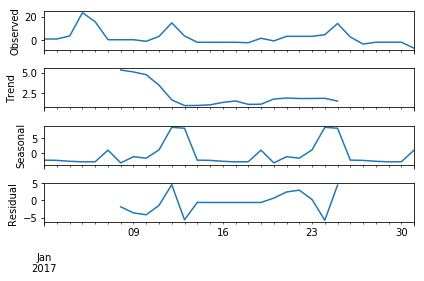

In [172]:
plt.figure(figsize=(15,10))
sm.tsa.seasonal_decompose(train['diff'].dropna(inplace=False), freq = 12).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(train['diff'].dropna(inplace=False))[1])

In [887]:
train['diff2'] = train['diff'] - train['diff'].shift(1)

Критерий Дики-Фуллера: p=0.000000


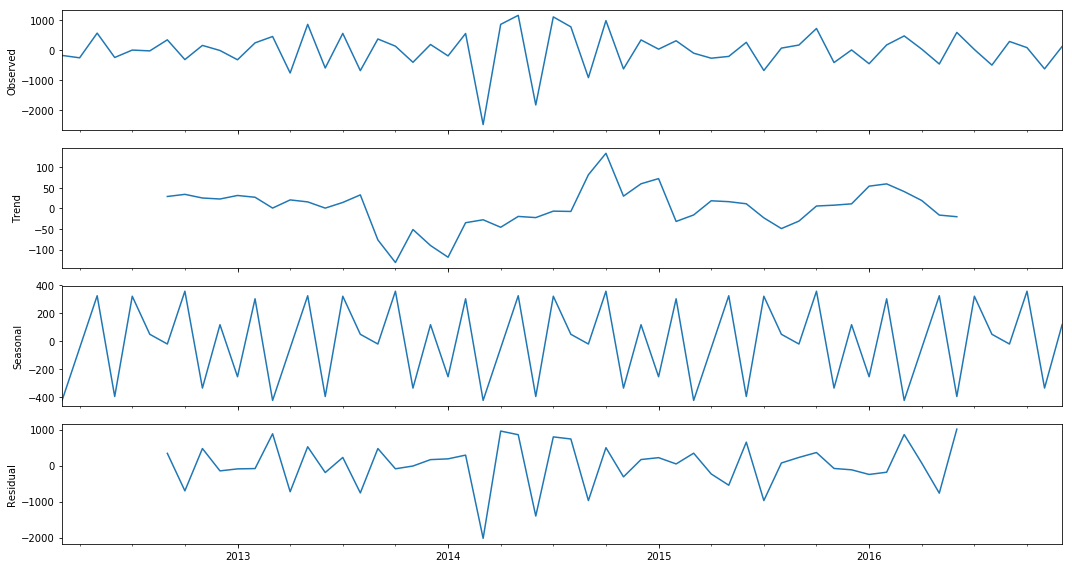

In [888]:
plt.figure(figsize=(15,10))
sm.tsa.seasonal_decompose(train['diff2'].dropna(inplace=False), freq = 12).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(train['diff2'].dropna(inplace=False))[1])

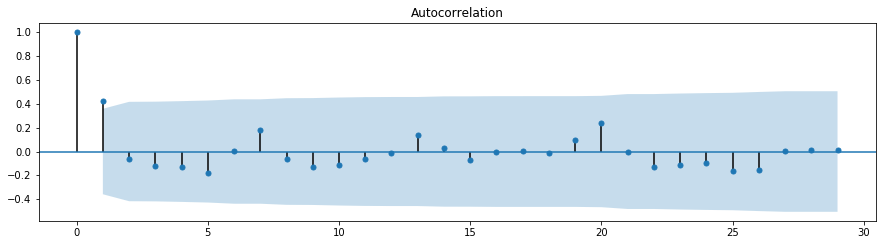

/Users/aleksandra/anaconda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


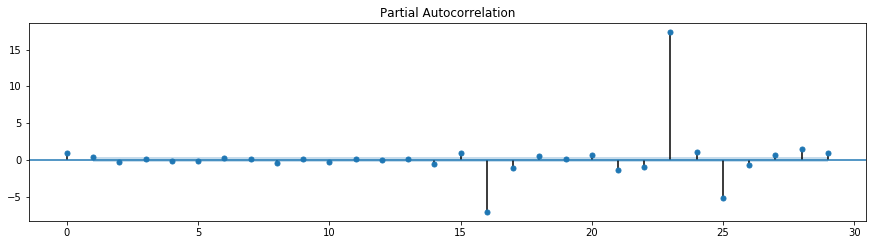

In [174]:
plt.figure(figsize=(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(train.dropna(inplace=False)['diff'].values.squeeze(),  ax=ax)
pylab.show()
plt.figure(figsize=(15,8))
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(train.dropna(inplace=False)['diff'].values.squeeze(),  ax=ax)
pylab.show()

# Выбор лучших коэффициентов ARIMA

In [179]:
#p - PACF
#q - ACF

ps = range(0,29)
d=1
qs = range(0,1)
Ps = range(0,2)
D=0
Qs = [0]

In [180]:
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

58

In [181]:
%%time
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')

for param in parameters_list:
    #try except нужен, потому что на некоторых наборах параметров модель не обучается
    try:
        model=sm.tsa.statespace.SARIMAX(train[X], order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    #выводим параметры, на которых модель не обучается и переходим к следующему набору
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    #сохраняем лучшую модель, aic, параметры
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
    
warnings.filterwarnings('default')

wrong parameters: (13, 0, 0, 0)
wrong parameters: (13, 0, 1, 0)
wrong parameters: (14, 0, 0, 0)
wrong parameters: (14, 0, 1, 0)
wrong parameters: (15, 0, 0, 0)
wrong parameters: (15, 0, 1, 0)
wrong parameters: (16, 0, 0, 0)
wrong parameters: (16, 0, 1, 0)
wrong parameters: (17, 0, 0, 0)
wrong parameters: (17, 0, 1, 0)
wrong parameters: (18, 0, 0, 0)
wrong parameters: (18, 0, 1, 0)
wrong parameters: (19, 0, 0, 0)
wrong parameters: (19, 0, 1, 0)
wrong parameters: (20, 0, 0, 0)
wrong parameters: (20, 0, 1, 0)
wrong parameters: (21, 0, 0, 0)
wrong parameters: (21, 0, 1, 0)
wrong parameters: (22, 0, 0, 0)
wrong parameters: (22, 0, 1, 0)
wrong parameters: (23, 0, 0, 0)
wrong parameters: (23, 0, 1, 0)
wrong parameters: (24, 0, 1, 0)
wrong parameters: (25, 0, 0, 0)
wrong parameters: (25, 0, 1, 0)


LinAlgError: Non-positive-definite forecast error covariance matrix encountered at period 1

In [182]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

     parameters         aic
2  (1, 0, 0, 0)  195.066575
4  (2, 0, 0, 0)  195.367294
6  (3, 0, 0, 0)  196.597923
3  (1, 0, 1, 0)  196.910032
5  (2, 0, 1, 0)  196.910840


# Анализ остатков

In [185]:
best_model.resid

2017-01-01    751.769989
2017-01-02      0.932630
2017-01-03      0.468079
2017-01-04      3.028092
2017-01-05     21.489448
2017-01-06      3.735475
2017-01-07     -7.573181
2017-01-08      0.152741
2017-01-09      0.152741
2017-01-10     -1.177216
2017-01-11      3.637405
2017-01-12     13.037272
2017-01-13     -3.916486
2017-01-14     -3.630504
2017-01-15     -0.913994
2017-01-16     -0.913994
2017-01-17     -0.913994
2017-01-18     -1.298974
2017-01-19      2.696309
2017-01-20     -1.501323
2017-01-21      3.543481
2017-01-22      1.568478
2017-01-23      1.568478
2017-01-24      2.945146
2017-01-25     11.766806
2017-01-26     -4.512561
2017-01-27     -4.714162
2017-01-28     -0.082051
2017-01-29     -0.885249
2017-01-30     -0.885249
2017-01-31     -5.988603
dtype: float64

Критерий Стьюдента: p=0.326230
Критерий Дики-Фуллера: p=0.000163


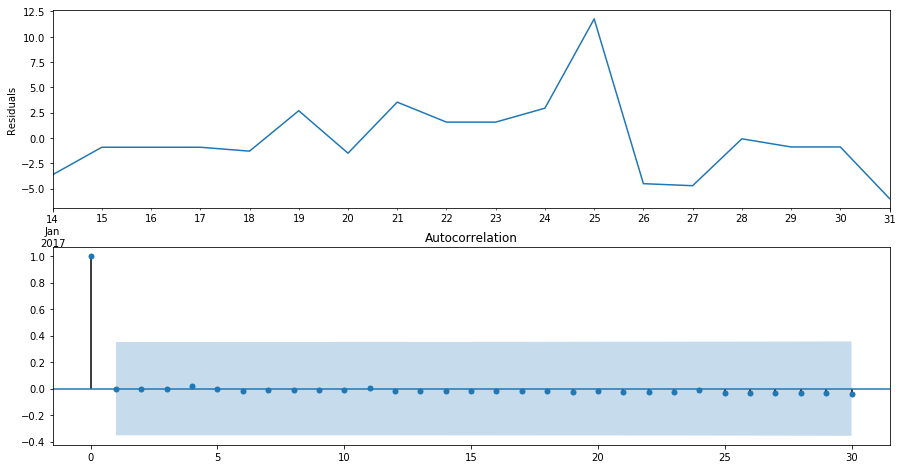

In [186]:
plt.figure(figsize(15,8))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid.values.squeeze(), ax=ax)

print("Критерий Стьюдента: p=%f" % stats.ttest_1samp(best_model.resid[1:], 0)[1])
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[1:])[1])

In [1004]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:           NCSoft_Corp_   No. Observations:                   60
Model:               SARIMAX(8, 1, 2)   Log Likelihood                -661.590
Date:                Wed, 30 May 2018   AIC                           1345.181
Time:                        02:53:28   BIC                           1368.034
Sample:                    01-01-2012   HQIC                          1354.101
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1515      0.320      3.598      0.000       0.524       1.779
ar.L2         -0.3253      0.266     -1.224      0.221      -0.846       0.196
ar.L3         -0.1042      0.200     -0.521      0.602      -0.496       0.288
ar.L4         -0.0991      0.246     -0.403      0.687      -0.581       0.383
ar.L5          0.1483      0.131      1.128      0.259      -0.109       0.406
ar.L6         -0.1309      0.098     -1.341      0.180      -0.322       0.060
ar.L7          0.1673      0.116      1.449      0.147      -0.059       0.394
ar.L8         -0.2202      0.107     -2.063      0.039      -0.429      -0.011
ma.L1         -1.2932      0.333     -3.878      0.000      -1.947      -0.640
ma.L2          0.5003      0.291      1.720      0.085      -0.070       1.070
sigma2      3.357e+08    2.2e-10   1.53e+18      0.000    3.36e+08    3.36e+08
===================================================================================
Ljung-Box (Q):                       36.76   Jarque-Bera (JB):                 0.71
Prob(Q):                              0.62   Prob(JB):                         0.70
Heteroskedasticity (H):               1.99   Skew:                            -0.22
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.4e+36. Standard errors may be unstable.
"""

In [1005]:
train['levels']=best_model.fittedvalues

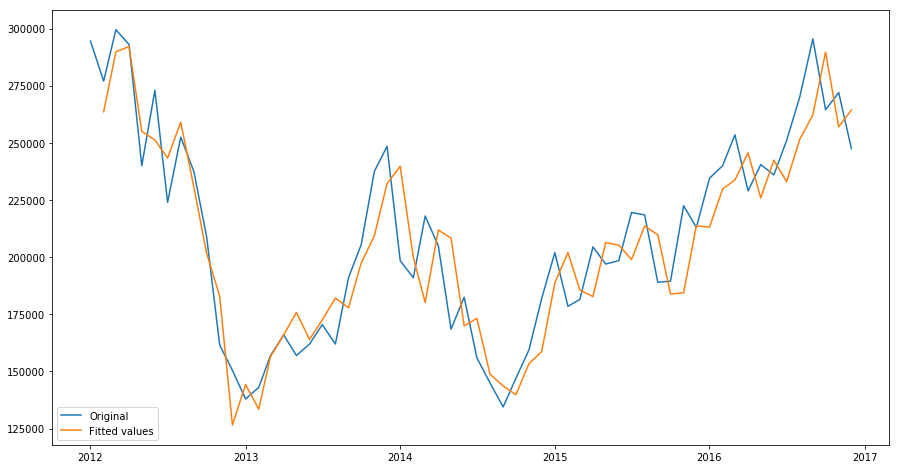

In [1006]:
plt.figure(figsize=(15,8))
plt.plot(train[X], label='Original')
plt.plot(train['levels'][1:], label='Fitted values')
plt.legend(loc='best')
plt.show()

In [1007]:
test = pd.read_excel('test.xlsx', sheet_name='semiconductor companies')

# Длинное предсказание

In [1008]:
test['long']=best_model.forecast(steps = 13)[0]

In [1009]:
test['long']=best_model.predict(60,72)

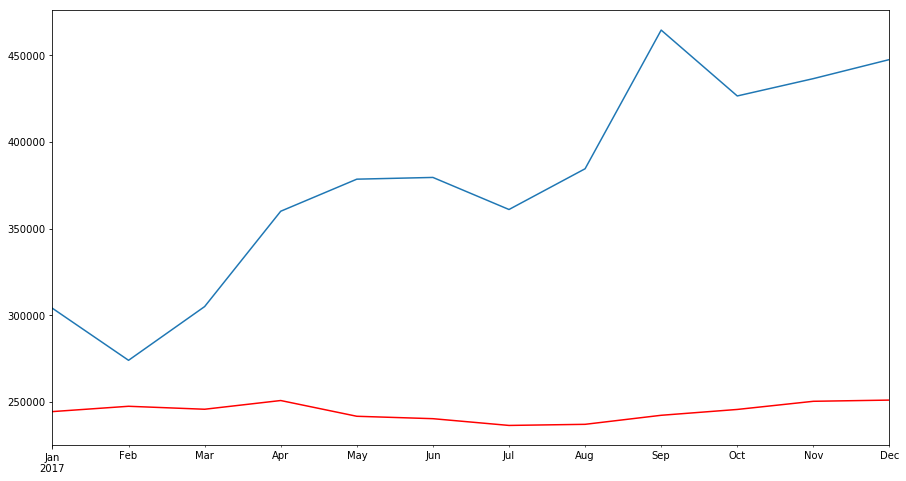

In [1010]:
plt.figure(figsize=(15,8))
test[X][0:12].plot()
test['long'].plot(color='r')

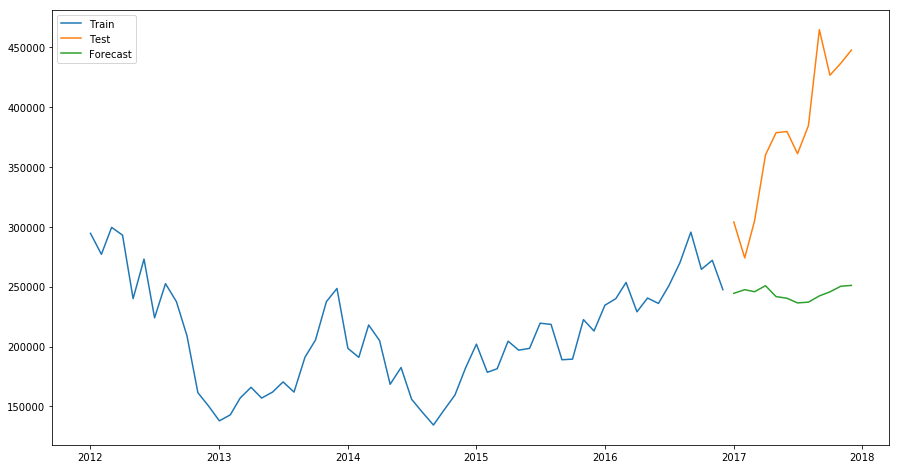

In [1011]:
plt.figure(figsize=(15,8))
plt.plot(train[X], label='Train')
plt.plot(test[X][:12], label='Test')
plt.plot(test['long'], label='Forecast')
plt.legend(loc='best')
plt.show()

In [1012]:
rmse = sqrt(mean_squared_error(test[X], test['long']))
rmse

144435.3211926349

# Пошаговое предсказание

In [741]:
train

,Lockheed_Martin_Corporation,diff,levels
2012-01-01,82.32,NaN,0.000000
2012-02-01,88.41,6.09,82.320326
2012-03-01,89.86,1.45,88.835323
2012-04-01,90.54,0.68,89.952465
2012-05-01,82.80,-7.74,90.577966
2012-06-01,87.08,4.28,84.105481
2012-07-01,89.27,2.19,88.928955
2012-08-01,91.14,1.87,89.032333
2012-09-01,93.38,2.24,89.899135
2012-10-01,93.67,0.29,93.492771


In [158]:
history = [x for x in train[X]]
predictions = []
for t in range(len(test)):
    model_fit = smt.ARIMA(history, order=(2,1,2)).fit(method='mle', trend='nc')
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat[0])
    obs = test[X][t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
#error = mean_squared_error(test, predictions)
#print('Test MSE: %.3f' % error)
# plot

In [159]:
predictions

[174.17368014879196,
 194.78066847306138,
 208.20929990542533,
 223.68053244032242,
 220.35892040857985,
 242.97130599114723,
 241.82718523671082,
 251.39890025409309,
 258.18182333770119,
 252.32602412439056,
 265.05457417616839,
 280.13090787049134,
 259.75359570962041]

In [160]:
test['1step'] = pd.Series(predictions, index = test.index)

In [161]:
test['1step']

2017-01-01    174.173680
2017-02-01    194.780668
2017-03-01    208.209300
2017-04-01    223.680532
2017-05-01    220.358920
2017-06-01    242.971306
2017-07-01    241.827185
2017-08-01    251.398900
2017-09-01    258.181823
2017-10-01    252.326024
2017-11-01    265.054574
2017-12-01    280.130908
2018-01-01    259.753596
Name: 1step, dtype: float64

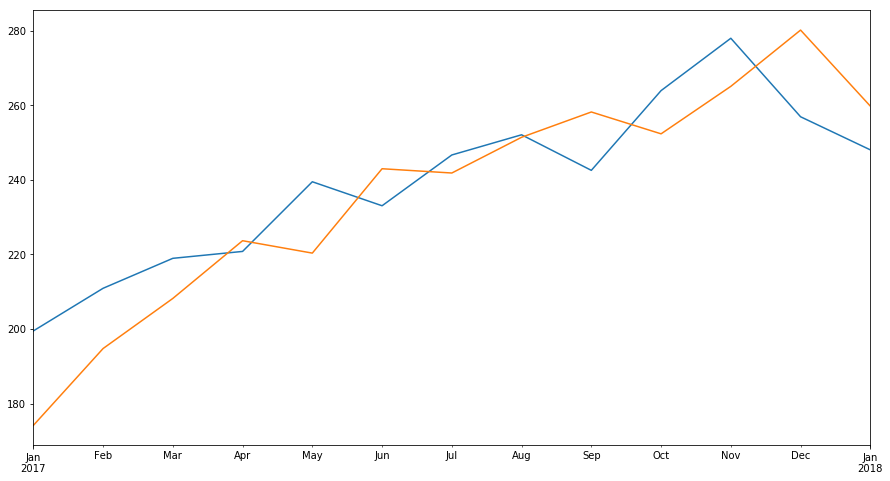

In [162]:
plt.figure(figsize=(15,8))
test[X].plot()
test['1step'].plot()

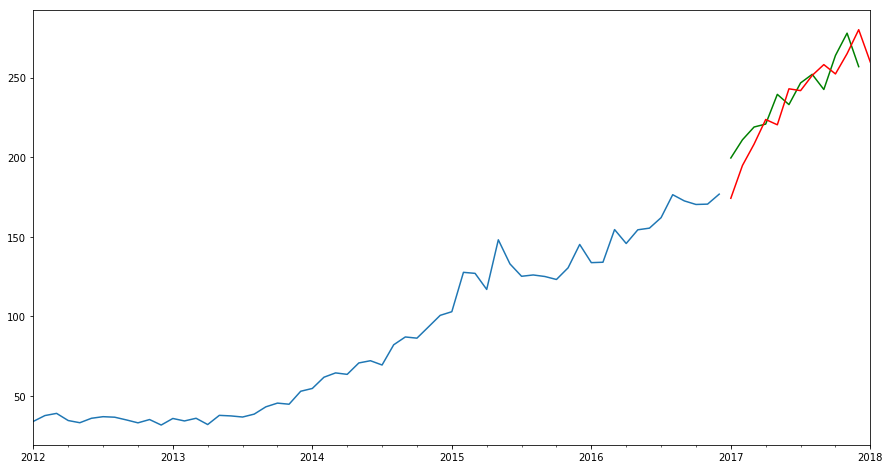

In [163]:
plt.figure(figsize=(15,8))
train[X].plot()
test[X][0:12].plot(color='g')
test['1step'].plot(color='r')

In [197]:
rmse = sqrt(mean_squared_error(test[X], test['long']))
rmse

69.375960787532392